In [12]:
import random
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation, patches
import numpy as np
from tensorflow import keras
from IPython.display import HTML, Image

matplotlib.rcParams["animation.embed_limit"] = 2**128

In [2]:
samples = 500

m = 2
xs = [i * m for i in range(samples)]
c = 50

ms = [m for _ in range(samples)]
cs = [c for _ in range(samples)]
ys = [m * x + c for x in xs]
noise = [random.randint(0,50) for _ in range(samples)]

data = {
    "ms": ms,
    "xs": xs,
    "cs": cs,
    "noise": noise, 
    "ys": ys
}

df = pd.DataFrame(data=data)
df.head(5)

,ms,xs,cs,noise,ys
0,2,0,50,36,50
1,2,2,50,26,54
2,2,4,50,13,58
3,2,6,50,22,62
4,2,8,50,36,66


In [3]:
columns = ["ms", "xs", "cs", "noise"]

X_train = df[columns]
y_train = df["ys"]

In [4]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=4, input_shape=[4]))
model.add(tf.keras.layers.Dense(units=1))
model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss="mean_squared_error")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = {
    "loss": [],
    0: {
        0: [],
        1: [],
        2: [],
        3: []
    },
    1: {
        0: [],
        1: [],
        2: [],
        3: []
    },
    2: {
        0: [],
        1: [],
        2: [],
        3: []
    },
    3: {
        0: [],
        1: [],
        2: [],
        3: []
    }, 
}

In [ ]:
for epoch in range(1, 501):
    hist = model.fit(X_train, y_train, epochs=1)
    history["loss"].append(hist.history["loss"])
    all_weights = model.layers[0].get_weights()[0].tolist()
    for weights in range(len(all_weights)):
        for weight in range(len(all_weights[weights])):
            history[weights][weight].append(all_weights[weights][weight])

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))

In [51]:

def run(i):
  ax.cla()
  ax.set_xlim(-1, 1)
  ax.set_ylim(-1, 1)
  for key in list(history.keys()):
    if key == "loss":
      continue
    for node in list(history[key].keys()):
      if node == 0:
        sym = "ro"
      elif node == 1:
        sym = "ko"
      elif node == 2:
        sym = "co"
      elif node == 3:
        sym = "mo"
      ax.plot(history[key][node][i], history[key][node][i], sym)
  
  ms = patches.Patch(color="r", label="M's")
  xs = patches.Patch(color="k", label="X's")
  cs = patches.Patch(color="c", label="C's")
  noise = patches.Patch(color="m", label="Noise")
  ax.legend(handles=[ms,xs,cs,noise],loc="upper left", fontsize="small")

In [52]:
anim = animation.FuncAnimation(fig, run, frames=500, interval=50)

In [53]:
HTML(anim.to_html5_video())

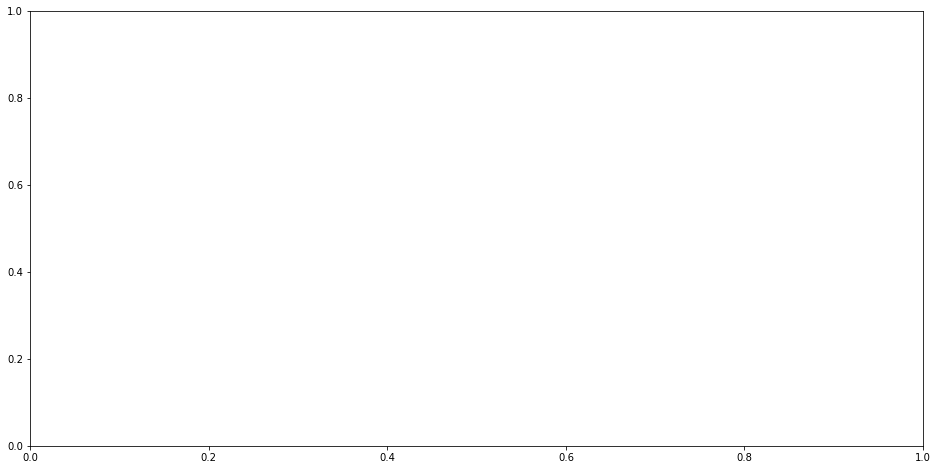

In [79]:
fig, ax = plt.subplots(figsize=(16,8))

In [80]:
def run(i):
  ax.cla()
  ax.set_ylim(-2, 2)
  m_one = history[0][0][i]
  m_two = history[0][1][i]
  m_three = history[0][2][i]
  m_four = history[0][3][i]
  
  x_one = history[1][0][i]
  x_two = history[1][1][i]
  x_three = history[1][2][i]
  x_four = history[1][3][i]

  c_one = history[2][0][i]
  c_two = history[2][1][i]
  c_three = history[2][2][i]
  c_four = history[2][3][i]

  noise_one = history[3][0][i]
  noise_two = history[3][1][i]
  noise_three = history[3][2][i]
  noise_four = history[3][3][i]
  ax.bar(
    [
      "M1", "M2", "M3", "M4", 
      "X1", "X2", "X3", "X4", 
      "C1", "C2", "C3", "C4", 
      "Noise 1", "Noise 2", "Noise 3", "Noise 4", 
    ],
    [
      m_one, m_two, m_three, m_four,
      x_one, x_two, x_three, x_four,
      c_one, c_two, c_three, c_four,
      noise_one, noise_two, noise_three, noise_four,
    ],
    color=[
      "r", "r", "r", "r",
      "g", "g", "g", "g",
      "y", "y", "y", "y", 
      "b", "b", "b", "b"
    ]
  )

In [81]:
anim = animation.FuncAnimation(fig, run, frames=500, interval=50)

In [82]:
HTML(anim.to_html5_video())